# Orbit Plot
REBOUND comes with a simple way to plot instantaneous orbits of planetary systems. To show how this works, let's setup a test simulation with 4 planets.

In [1]:
import rebound
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, e=0.841, a=0.4, inc=0.2, l=0.43)
sim.add(m=1e-3, e=0.8324, a=1.5, omega=1.14, l=2.1)
sim.add(m=1e-3, e=0.843, a=2, omega=2.4, l=-1.94)
sim.add(a=2.7, e=0.84, l=3.1415/2.)

To plot these initial orbits in the $xy$-plane, we can simply call the `OrbitPlot` function and give it the simulation as an argument.

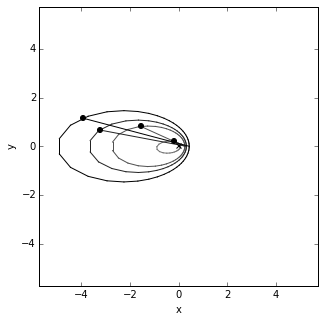

In [2]:
%matplotlib inline
fig = rebound.OrbitPlot(sim)

Note that the `OrbitPlot` function chooses reasonable limits for the axes for you. There are various ways to customize the plot.

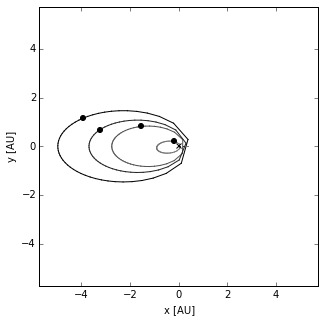

In [3]:
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", showPeriastron=True)

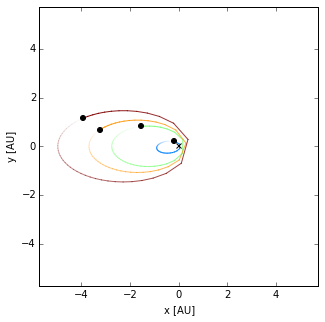

In [4]:
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, trails=True)

All orbits are draw with respect to the center of mass of all interior particles. This is known as Jacobi coordinates. Thus, the particles need to be sorted in the REBOUND simulation. 

In [5]:
print sim.particles[-1]

<rebound.Particle object, id=-1 m=0.0 x=0.0305440753938 y=7.01417021602 z=0.00273307298684 vx=-0.46039223601 vy=0.149670938758 vz=0.0303712954974>


In [17]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(a=1,e=0.1,omega=1)
o = sim.calculate_orbits()
print o[0]

<rebound.Orbit instance, a=1.0 e=0.1 inc=0.0 Omega=0.0 omega=0.0 f=2.58095682795e-08>


In [10]:
print o[3]

<rebound.Orbit instance, a=2.7 e=0.84 inc=0.0 Omega=0.0 omega=0.0 f=2.85558622978>
